# Screening AUSAB serum for neutralization activity against H3N2 flu strain A/HongKong/45/2019

In [1]:
import pandas as pd
import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.3g}'.format)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 400)

First, we screened 16 serum samples (AUSAB-01 to 16) for neutralization activity against A/H3N2 HK/45/2019.

In [3]:
data_run1 = (
    pd.read_excel('neut_data/2022-01-14-HK19_AlexGreninger_AUSAB01-16_tidy.xlsx')
      .assign(virus='HK19_WT_run1')
)
data_run1.head()

,serum,virus,replicate,concentration,fraction infectivity
0,01-AUSAB,HK19_WT_run1,1,0.05,0.26
1,01-AUSAB,HK19_WT_run1,1,0.025,0.454
2,01-AUSAB,HK19_WT_run1,1,0.0125,0.844
3,01-AUSAB,HK19_WT_run1,1,0.00625,0.812
4,01-AUSAB,HK19_WT_run1,1,0.00313,0.872


We then re-screened some of the serum samples against A/H3N2 HK/45/2019 and H6/R235M.

In [4]:
data_run2 = pd.read_excel('neut_data/2022-01-19_HK19_redone_H6R235M_AG_AUSAB_tidy.xlsx')
data_run2.head()

,serum,virus,replicate,concentration,fraction infectivity
0,05-AUSAB,HK19_WT,1,0.0125,0.026
1,05-AUSAB,HK19_WT,1,0.00625,0.0573
2,05-AUSAB,HK19_WT,1,0.00313,0.225
3,05-AUSAB,HK19_WT,1,0.00156,0.381
4,05-AUSAB,HK19_WT,1,0.000781,0.61


Lets combine the data from the two runs and analyze them together.

In [5]:
data = data_run1.append(data_run2)
data.head()

,serum,virus,replicate,concentration,fraction infectivity
0,01-AUSAB,HK19_WT_run1,1,0.05,0.26
1,01-AUSAB,HK19_WT_run1,1,0.025,0.454
2,01-AUSAB,HK19_WT_run1,1,0.0125,0.844
3,01-AUSAB,HK19_WT_run1,1,0.00625,0.812
4,01-AUSAB,HK19_WT_run1,1,0.00313,0.872


Fit the neutralization curves.

In [6]:
fits = neutcurve.CurveFits(data)

Summary of the fits.

In [7]:
for serum in fits.sera:
    print(f"Viruses measured against {serum}:\n" +
          str(fits.viruses[serum]))

Viruses measured against 01-AUSAB:
['HK19_WT_run1']
Viruses measured against 02-AUSAB:
['HK19_WT_run1', 'H6_R235M']
Viruses measured against 03-AUSAB:
['HK19_WT_run1']
Viruses measured against 04-AUSAB:
['HK19_WT_run1']
Viruses measured against 05-AUSAB:
['HK19_WT_run1', 'HK19_WT', 'H6_R235M']
Viruses measured against 06-AUSAB:
['HK19_WT_run1', 'H6_R235M']
Viruses measured against 07-AUSAB:
['HK19_WT_run1', 'HK19_WT', 'H6_R235M']
Viruses measured against 08-AUSAB:
['HK19_WT_run1', 'HK19_WT', 'H6_R235M']
Viruses measured against 09-AUSAB:
['HK19_WT_run1']
Viruses measured against 10-AUSAB:
['HK19_WT_run1', 'H6_R235M']
Viruses measured against 11-AUSAB:
['HK19_WT_run1', 'HK19_WT', 'H6_R235M']
Viruses measured against 12-AUSAB:
['HK19_WT_run1']
Viruses measured against 13-AUSAB:
['HK19_WT_run1', 'HK19_WT', 'H6_R235M']
Viruses measured against 14-AUSAB:
['HK19_WT_run1', 'H6_R235M']
Viruses measured against 15-AUSAB:
['HK19_WT_run1']
Viruses measured against 16-AUSAB:
['HK19_WT_run1', 'HK19

Plot the neutralization curves.

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/neutcurve/hillcurve.py:451: RuntimeWarning: invalid value encountered in sqrt
  perr = numpy.sqrt(numpy.diag(pcov))
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/neutcurve/hillcurve.py:741: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m)**s)


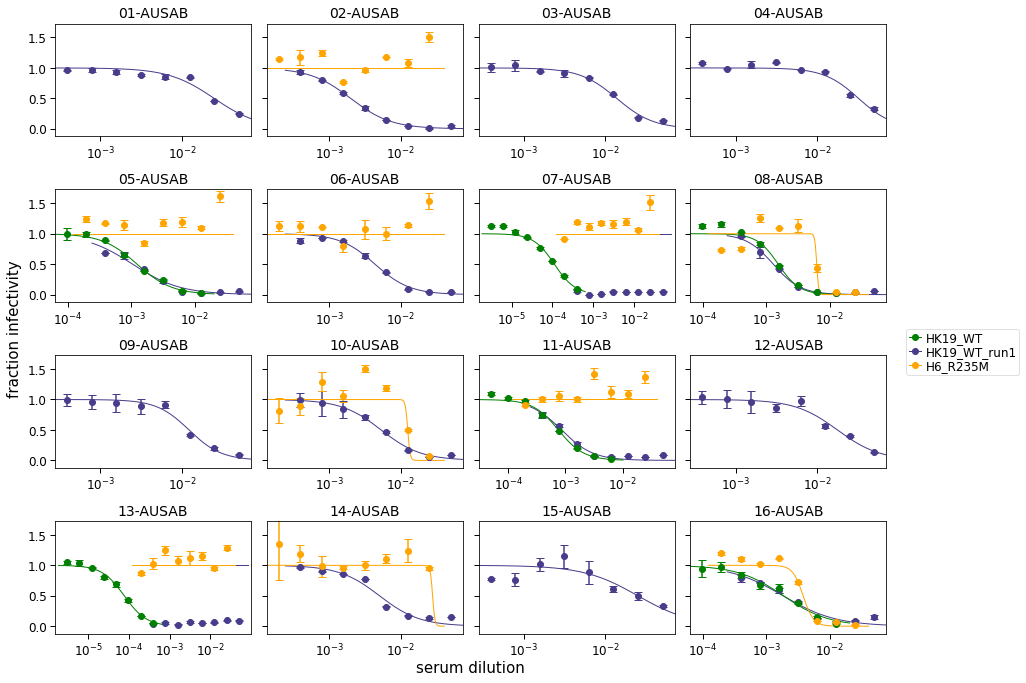

In [8]:
fig, axes = fits.plotSera(ncol=4,
                          xlabel='serum dilution',
                          virus_to_color_marker={
                              'HK19_WT': ('green', 'o'),
                              'HK19_WT_run1': ('DarkSlateBlue', 'o'),
                              'H6_R235M': ('orange', 'o')},
                          sharex = False
                         )

It appears that all of the serum samples have neutralizing activity against the wildtype HK19 virus. Surprisingly, three serum samples (AUSAB-08, 10, 16) also had neutralizing activity against the H6 R235M virus.

Here are the IC50's and IC99's for each of the serum samples.

In [9]:
fits.fitParams(ics=[50,99])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,01-AUSAB,HK19_WT_run1,average,2,0.0248,interpolated,0.0248,0.05,lower,>0.05,0.0248,1.55,1,0
1,02-AUSAB,HK19_WT_run1,average,2,0.00197,interpolated,0.00197,0.04,interpolated,0.04,0.00197,1.53,1,0
2,02-AUSAB,H6_R235M,average,2,0.025,lower,>0.025,0.025,lower,>0.025,0.255,9.94,1,0
3,03-AUSAB,HK19_WT_run1,average,2,0.0137,interpolated,0.0137,0.05,lower,>0.05,0.0137,1.92,1,0
4,04-AUSAB,HK19_WT_run1,average,2,0.032,interpolated,0.032,0.05,lower,>0.05,0.032,2.06,1,0
5,05-AUSAB,HK19_WT_run1,average,2,0.00105,interpolated,0.00105,0.05,lower,>0.05,0.00105,1.16,1,0
6,05-AUSAB,HK19_WT,average,2,0.00124,interpolated,0.00124,0.0125,lower,>0.0125,0.00124,1.58,1,0
7,05-AUSAB,H6_R235M,average,2,0.025,lower,>0.025,0.025,lower,>0.025,0.27,10.1,1,0
8,06-AUSAB,HK19_WT_run1,average,2,0.00433,interpolated,0.00433,0.05,lower,>0.05,0.00433,1.78,1,0
9,06-AUSAB,H6_R235M,average,2,0.025,lower,>0.025,0.025,lower,>0.025,0.242,10.3,1,0


To rule out insufficient RDE-treatment and non-specific inhibitors as an explanation for H6 neutralization, we re-treated samples and repeated the experiment.

In [10]:
data_redone = pd.read_excel('neut_data/2022-01-27-H6R235M-neuts-verification-tidy.xlsx')
data_redone.head()

,serum,virus,replicate,concentration,fraction infectivity
0,08-AUSAB-old,H6_R235M,1,0.025,0.0403
1,08-AUSAB-old,H6_R235M,1,0.0125,0.0109
2,08-AUSAB-old,H6_R235M,1,0.00625,0.337
3,08-AUSAB-old,H6_R235M,1,0.00313,0.821
4,08-AUSAB-old,H6_R235M,1,0.00156,1.06


Fit the neutralization curves and plot them.

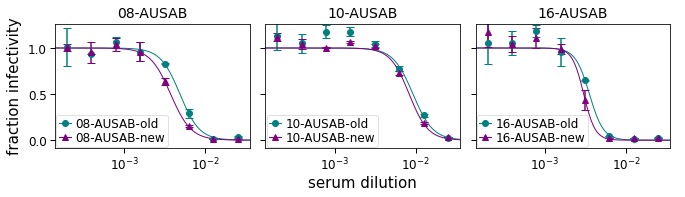

In [11]:
fits_redone = neutcurve.CurveFits(data_redone)

fig, axes = fits_redone.plotGrid(
                {
                 (0, 0): ('08-AUSAB',
                          [{'serum': '08-AUSAB-old', 'virus': 'H6_R235M',
                            'replicate': 'average', 'color': 'teal',
                            'marker': CBMARKERS[0], 'label':'08-AUSAB-old'},
                           {'serum': '08-AUSAB-new', 'virus': 'H6_R235M',
                            'replicate': 'average', 'color': 'purple',
                            'marker': CBMARKERS[1], 'label':'08-AUSAB-new'},
                           ]
                          ),
                 (0, 1): ('10-AUSAB',
                          [{'serum': '10-AUSAB-old', 'virus': 'H6_R235M',
                            'replicate': 'average', 'color': 'teal',
                            'marker': CBMARKERS[0], 'label':'10-AUSAB-old'},
                           {'serum': '10-AUSAB-new', 'virus': 'H6_R235M',
                            'replicate': 'average', 'color': 'purple',
                            'marker': CBMARKERS[1], 'label':'10-AUSAB-new'},
                           ]
                          ),
                 (0, 2): ('16-AUSAB',
                          [{'serum': '16-AUSAB-old', 'virus': 'H6_R235M',
                            'replicate': 'average', 'color': 'teal',
                            'marker': CBMARKERS[0], 'label':'16-AUSAB-old'},
                           {'serum': '16-AUSAB-new', 'virus': 'H6_R235M',
                            'replicate': 'average', 'color': 'purple',
                            'marker': CBMARKERS[1], 'label':'16-AUSAB-new'},
                           ]
                          ),
                 
                 },
                xlabel='serum dilution',
                )

These curves suggest that RDE-treatment was not an issue. We also verified that there was no contamination in the viral RNA extract using Sanger sequencing.

Lastly, it is not possible to estimate an accurate IC99 from each of the runs independently for AUSAB-07 and AUSAB-13, so let's combine the data for AUSAB-07 and AUSAB-13 across both runs to estimate a more accurate IC99. 

In [12]:
data_run2_7_13 = (
    pd.read_excel('neut_data/2022-01-19_HK19_redone_H6R235M_AG_AUSAB_tidy.xlsx')
      .query('serum == "07-AUSAB" or serum == "13-AUSAB"')
      .query('virus == "HK19_WT"')
)

data_run1_7_13 = (
    pd.read_excel('neut_data/2022-01-14-HK19_AlexGreninger_AUSAB01-16_tidy.xlsx')
      .query('serum == "07-AUSAB" or serum == "13-AUSAB"')
      .query('virus == "HK19_WT"')
      .query('concentration != 0.000390625') # drop this, measured in second run already
)

data_7_13 = data_run1_7_13.append(data_run2_7_13)
data_7_13.head()

,serum,virus,replicate,concentration,fraction infectivity
96,07-AUSAB,HK19_WT,1,0.05,0.0368
97,07-AUSAB,HK19_WT,1,0.025,0.0463
98,07-AUSAB,HK19_WT,1,0.0125,0.0346
99,07-AUSAB,HK19_WT,1,0.00625,0.0424
100,07-AUSAB,HK19_WT,1,0.00313,0.036


In [13]:
fits_7_13 = neutcurve.CurveFits(data_7_13)
fits_7_13.fitParams(ics=[50,99])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,07-AUSAB,HK19_WT,average,2,0.000111,interpolated,0.000111,0.00158,interpolated,0.00158,0.000111,1.73,1,0
1,13-AUSAB,HK19_WT,average,2,7.69e-05,interpolated,7.69e-05,0.00147,interpolated,0.00147,7.69e-05,1.56,1,0
